In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from skimage import io
import os

import matplotlib.animation as ani
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 1000
%matplotlib inline

In [2]:
source_dir = Path('../data/source/test_img')
target_dir = Path('../results/target/test_latest/images')

In [3]:
source_img_paths = sorted(source_dir.iterdir())
target_synth_paths = sorted(target_dir.glob('*synthesized*'))
target_label_paths = sorted(target_dir.glob('*input*'))

print(len(source_img_paths))
print(len(target_synth_paths))
print(len(target_label_paths))

len(source_img_paths) == len(target_synth_paths) == len(target_label_paths)

40
40
40


True

In [4]:
def animate(nframe):
    ax1.clear()
    ax2.clear()
    ax3.clear()

    source_img = io.imread(source_img_paths[nframe])
    ax1.imshow(source_img)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    target_label = io.imread(target_label_paths[nframe])
    ax2.imshow(target_label)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    target_synth = io.imread(target_synth_paths[nframe])
    ax3.imshow(target_synth)
    ax3.set_xticks([])
    ax3.set_yticks([])    

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

print(len(target_label_paths))
anim = ani.FuncAnimation(fig, animate, frames=len(target_label_paths), interval=1000/24)
plt.close()

40


In [5]:
js_anim = HTML(anim.to_jshtml())
js_anim

In [14]:
#anim.save("output.gif", writer="imagemagick")


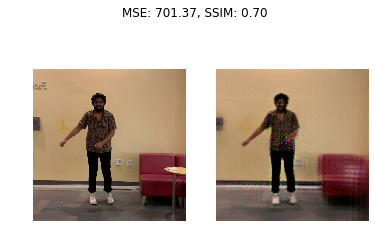

In [15]:
# SSIM - Structural Similarity comparison
# import the necessary packages
from skimage.measure import compare_ssim as ssim
#from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def display_compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB, multichannel=True)

    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()

def compare_images(imageA, imageB):
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB, multichannel=True)
    
    return m,s

imageA = cv2.imread('../results/test10/real_image_0039.png')
imageB = cv2.imread('../results/test10/synth_image_0039.png')

display_compare_images(imageA, imageB, 'Title')
  
######################################################################
# for file_num in range(1, len(target_label_paths)+1):
#     imageA = cv2.imread('../results/test1/real_image_0017.png')
#     imageB = cv2.imread('../results/test1/synth_image_0017.png')    
#     mse_val, ssim_val = compare_images(imageA, imageB)

../results/test10/real_image_0001.png
../results/test10/real_image_0002.png
../results/test10/real_image_0003.png
../results/test10/real_image_0004.png
../results/test10/real_image_0005.png
../results/test10/real_image_0006.png
../results/test10/real_image_0007.png
../results/test10/real_image_0008.png
../results/test10/real_image_0009.png
../results/test10/real_image_0010.png
../results/test10/real_image_0011.png
../results/test10/real_image_0012.png
../results/test10/real_image_0013.png
../results/test10/real_image_0014.png
../results/test10/real_image_0015.png
../results/test10/real_image_0016.png
../results/test10/real_image_0017.png
../results/test10/real_image_0018.png
../results/test10/real_image_0019.png
../results/test10/real_image_0020.png
../results/test10/real_image_0021.png
../results/test10/real_image_0022.png
../results/test10/real_image_0023.png
../results/test10/real_image_0024.png
../results/test10/real_image_0025.png
../results/test10/real_image_0026.png
../results/t

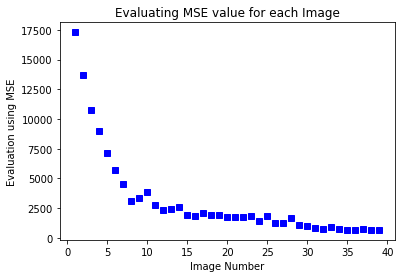

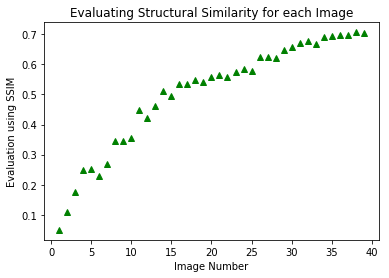

Average MSE Value: 3119.342576638246
Average SSIM Value: 0.5045890909095624


In [16]:
mse_arr = []
ssim_arr = []
x_arr = []

#totframe = len(target_label_paths)
totepoch = 40
for file_num in range(1, totepoch):
    maindir = '../results/test10/'
    real_img = cv2.imread(maindir + 'real_image_' + '{:04d}'.format(file_num) + '.png')
    synth_img = cv2.imread(maindir + 'synth_image_' + '{:04d}'.format(file_num) + '.png')
    print(maindir + 'real_image_' + '{:04d}'.format(file_num) + '.png')
#     print(maindir + 'real_image_' + '{:04d}'.format(file_num) + '.png')
#     print(maindir + 'synth_image_' + '{:04d}'.format(file_num) + '.png')
    mse_val, ssim_val = compare_images(real_img, synth_img)
    mse_arr.append(mse_val)
    ssim_arr.append(ssim_val)
    x_arr.append(file_num)

plt.plot(x_arr, mse_arr, 'bs')
plt.xlabel('Image Number')
plt.ylabel('Evaluation using MSE')
plt.title('Evaluating MSE value for each Image')
plt.show()

plt.plot(x_arr, ssim_arr, 'g^')
plt.xlabel('Image Number')
plt.ylabel('Evaluation using SSIM')
plt.title('Evaluating Structural Similarity for each Image')
plt.show()

# results for table
print("Average MSE Value:", np.mean(mse_arr)) # want lower
print("Average SSIM Value:", np.mean(ssim_arr)) # want higher ( max = 1)

In [50]:
# #LPIPS - Learned Perceptual Image Patch Similarity
# import torch

# def forward(in0, in1, retNumpy=True):
#     ''' Function computes the distance between image patches in0 and in1
#     INPUTS
#         in0, in1 - torch.Tensor object of shape Nx3xXxY - image patch scaled to [-1,1]
#         retNumpy - [False] to return as torch.Tensor, [True] to return as numpy array
#     OUTPUT
#         computed distances between in0 and in1
#     '''

#     input_ref = in0
#     input_p0 = in1

#     if(use_gpu):
#         input_ref = self.input_ref.cuda()
#         input_p0 = self.input_p0.cuda()

#     self.var_ref = Variable(self.input_ref,requires_grad=True)
#     self.var_p0 = Variable(self.input_p0,requires_grad=True)

#     self.d0 = self.forward_pair(self.var_ref, self.var_p0)
#     self.loss_total = self.d0

#     def convert_output(d0):
#         if(retNumpy):
#             ans = d0.cpu().data.numpy()
#             if not self.spatial:
#                 ans = ans.flatten()
#             else:
#                 assert(ans.shape[0] == 1 and len(ans.shape) == 4)
#                 return ans[0,...].transpose([1, 2, 0])                  # Reshape to usual numpy image format: (height, width, channels)
#             return ans
#         else:
#             return d0

#     if spatial:
#         L = [convert_output(x) for x in self.d0]
#         spatial_shape = self.spatial_shape
#         if spatial_shape is None:
#             if(self.spatial_factor is None):
#                 spatial_shape = (in0.size()[2],in0.size()[3])
#             else:
#                 spatial_shape = (max([x.shape[0] for x in L])*self.spatial_factor, max([x.shape[1] for x in L])*self.spatial_factor)

#         L = [skimage.transform.resize(x, spatial_shape, order=self.spatial_order, mode='edge') for x in L]

#         L = np.mean(np.concatenate(L, 2) * len(L), 2)
#         return L
#     else:
#         return convert_output(self.d0)

In [10]:
# def im2tensor(image, imtype=np.uint8, cent=1., factor=255./2.):
# # def im2tensor(image, imtype=np.uint8, cent=1., factor=1.):
#     return torch.Tensor((image / factor - cent)
#                         [:, :, :, np.newaxis].transpose((3, 2, 0, 1)))

In [11]:
# def load_image(path):
#     if(path[-3:] == 'dng'):
#         import rawpy
#         with rawpy.imread(path) as raw:
#             img = raw.postprocess()
#         # img = plt.imread(path)
#     elif(path[-3:]=='bmp' or path[-3:]=='jpg' or path[-3:]=='png'):
#         import cv2
#         return cv2.imread(path)[:,:,::-1]
#     else:
#         img = (255*plt.imread(path)[:,:,:3]).astype('uint8')

#     return img

In [7]:
# # Load images
# imageA = im2tensor(load_image('../results/test1/real_image_0017.png')) # RGB image from [-1,1]
# imageB = im2tensor(load_image('../results/test1/synth_image_0017.png'))

# # Compute distance
# dist01 = forward(imageA,imageB)
# print('Distance: %.3f'%dist01)